In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [4]:
import pandas as pd
from src import ComputationalHypergraphDiscovery as CHD
from src.ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import matplotlib.pyplot as plt
import networkx as nx

# Study all available data

In [5]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [6]:
kernels=[LinearMode(),QuadraticMode()]

In [7]:
graph_discovery=CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 29/29 [00:05<00:00,  5.47it/s]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.7863210536043359, Z=(0.99, 1.00), gamma=2.19e+01
Kernel [quadratic] has n/(n+s)=0.8664320537068075, Z=(0.94, 0.96), gamma=1.23e+00
new_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.84 after pruning)


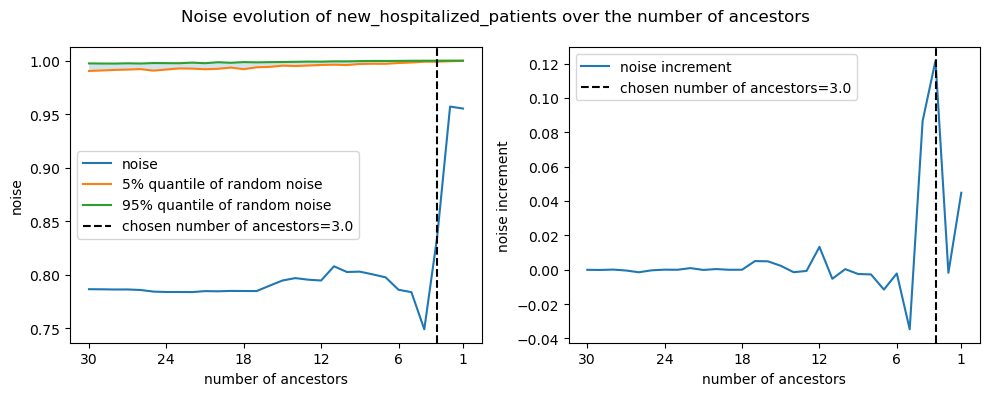

Ancestors of new_hospitalized_patients: ['current_hospitalized_patients', 'new_intensive_care_patients', 'current_intensive_care_patients']


Results for cumulative_hospitalized_patients
Kernel [linear] has n/(n+s)=0.7041282465849621, Z=(1.00, 1.00), gamma=4.21e-04
Kernel [quadratic] has n/(n+s)=0.7838605700843488, Z=(0.93, 0.96), gamma=9.94e-06
cumulative_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.91 after pruning)


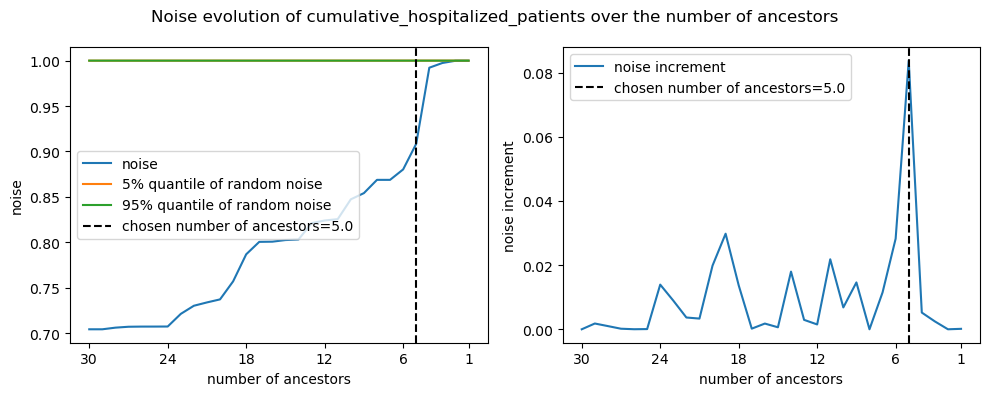

Ancestors of cumulative_hospitalized_patients: ['current_hospitalized_patients', 'cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed', 'cumulative_recovered']


Results for new_intensive_care_patients
Kernel [linear] has n/(n+s)=0.7642548872410235, Z=(0.99, 1.00), gamma=2.01e+01
Kernel [quadratic] has n/(n+s)=0.8457654641298581, Z=(0.94, 0.96), gamma=1.57e+00
new_intensive_care_patients has ancestors with the kernel [linear] | (n/(s+n)=0.85 after pruning)


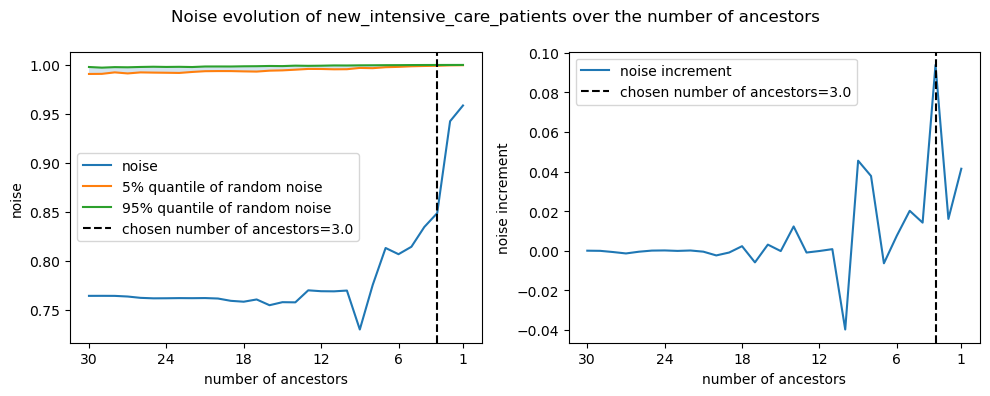

Ancestors of new_intensive_care_patients: ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients']


Results for facial_coverings
Kernel [linear] has n/(n+s)=0.8652260768499267, Z=(0.99, 1.00), gamma=3.54e+01
Kernel [quadratic] has n/(n+s)=0.8883500376797482, Z=(0.94, 0.96), gamma=2.49e+00
facial_coverings has ancestors with the kernel [linear] | (n/(s+n)=0.91 after pruning)


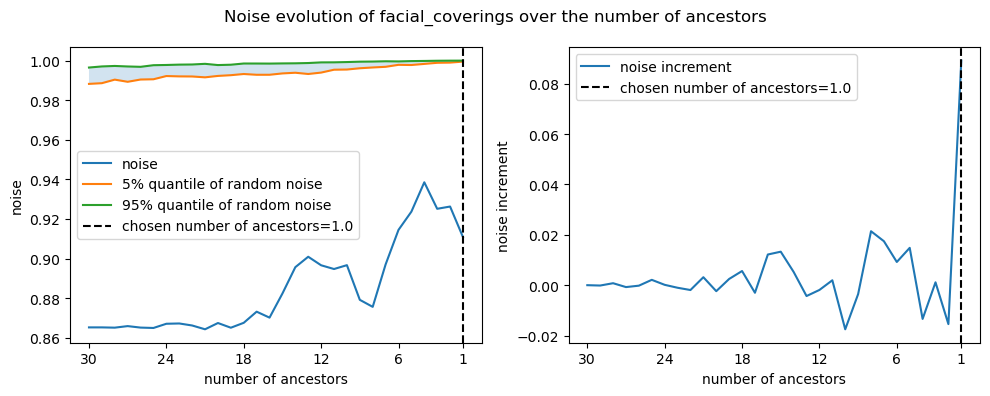

Ancestors of facial_coverings: ['stay_at_home_requirements']


Results for vaccination_policy
Kernel [linear] has n/(n+s)=0.8398381504867176, Z=(0.99, 1.00), gamma=1.67e+01
Kernel [quadratic] has n/(n+s)=0.845019477765822, Z=(0.94, 0.96), gamma=2.99e-01
vaccination_policy has ancestors with the kernel [linear] | (n/(s+n)=0.73 after pruning)


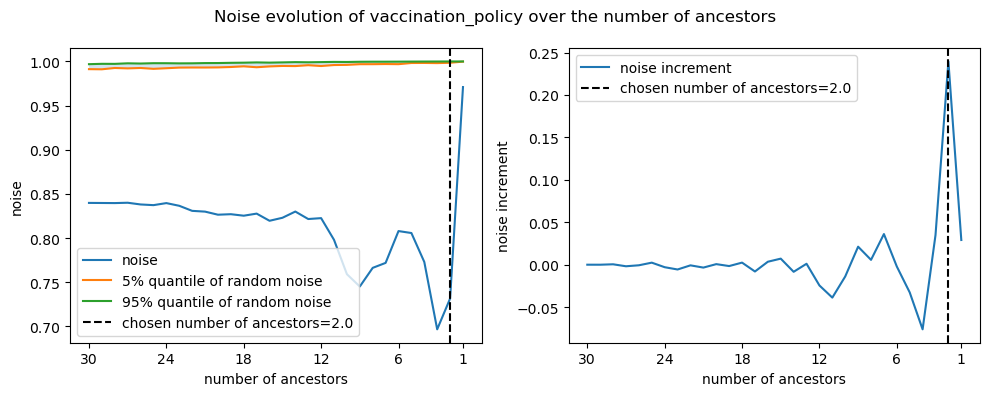

Ancestors of vaccination_policy: ['cumulative_intensive_care_patients', 'cumulative_recovered']


Results for stringency_index
Kernel [linear] has n/(n+s)=0.7748121422522315, Z=(1.00, 1.00), gamma=4.50e-01
Kernel [quadratic] has n/(n+s)=0.780308280332674, Z=(0.93, 0.96), gamma=1.39e-03
stringency_index has ancestors with the kernel [linear] | (n/(s+n)=0.77 after pruning)


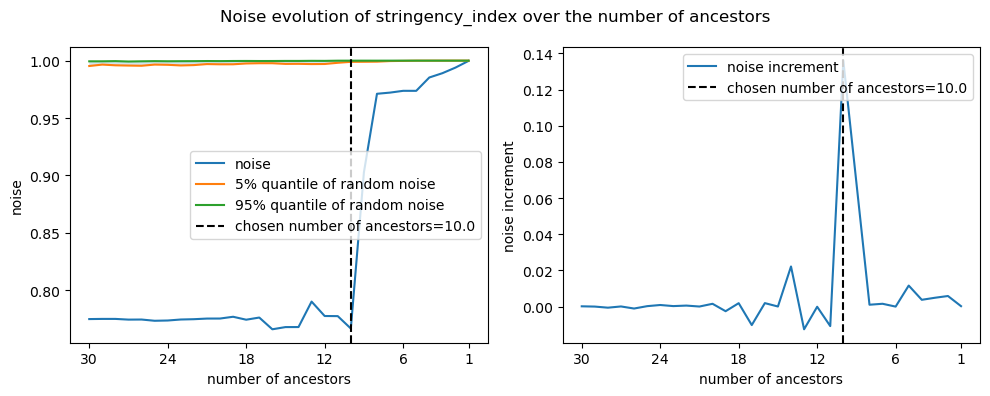

Ancestors of stringency_index: ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'cumulative_persons_fully_vaccinated']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.8441481216732657, Z=(0.99, 1.00), gamma=8.05e+01
Kernel [quadratic] has n/(n+s)=0.9303268975946011, Z=(0.95, 0.97), gamma=3.03e+00
new_deceased has ancestors with the kernel [linear] | (n/(s+n)=0.90 after pruning)


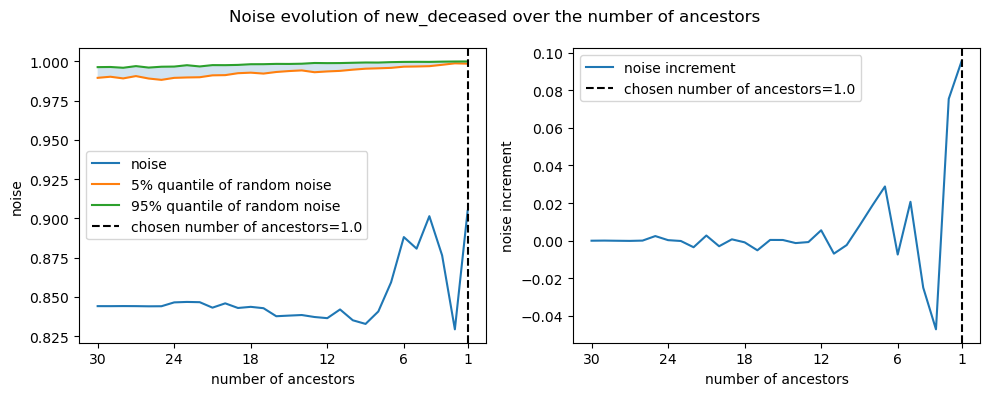

Ancestors of new_deceased: ['new_hospitalized_patients']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.6189490656651877, Z=(1.00, 1.00), gamma=5.11e-04
Kernel [quadratic] has n/(n+s)=0.7514180235273181, Z=(0.92, 0.96), gamma=1.90e-05
new_recovered has ancestors with the kernel [linear] | (n/(s+n)=0.87 after pruning)


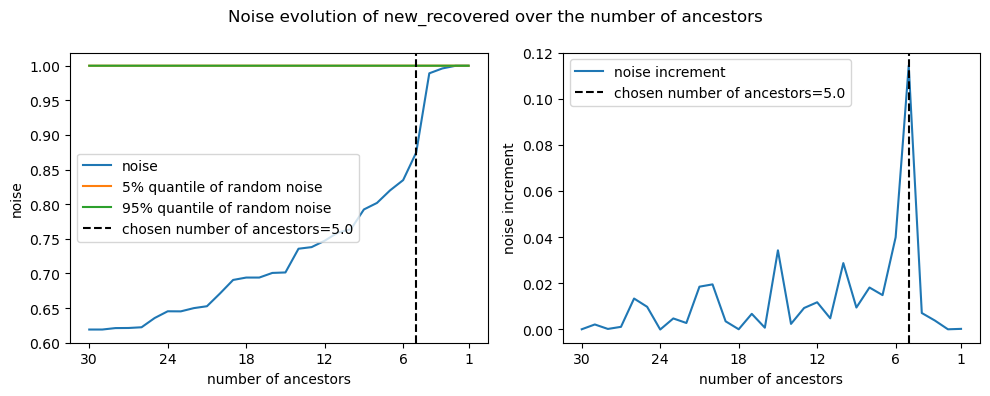

Ancestors of new_recovered: ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_confirmed', 'cumulative_recovered']


Results for new_tested
Kernel [linear] has n/(n+s)=0.7953316263905572, Z=(0.99, 1.00), gamma=7.85e+01
Kernel [quadratic] has n/(n+s)=0.821616142577917, Z=(0.95, 0.96), gamma=3.76e+00
new_tested has ancestors with the kernel [linear] | (n/(s+n)=0.81 after pruning)


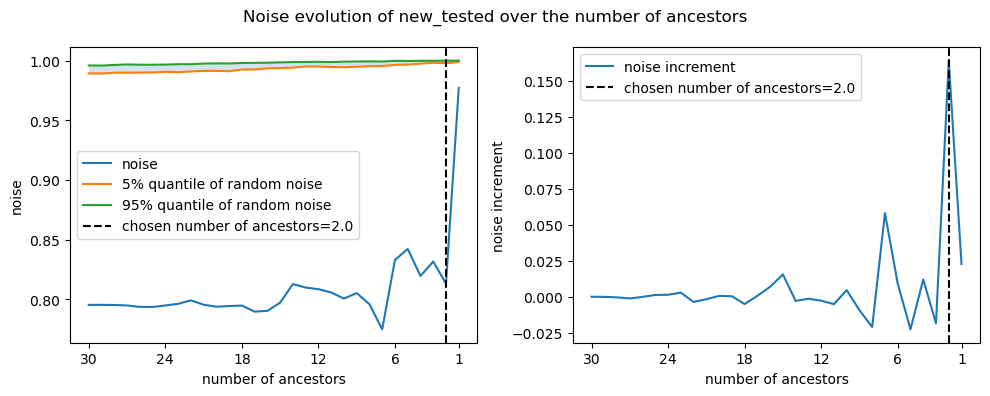

Ancestors of new_tested: ['new_hospitalized_patients', 'current_hospitalized_patients']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=4.907998367697644e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.4740556104983157e-06, Z=(0.96, 0.99), gamma=1.00e-09
new_persons_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


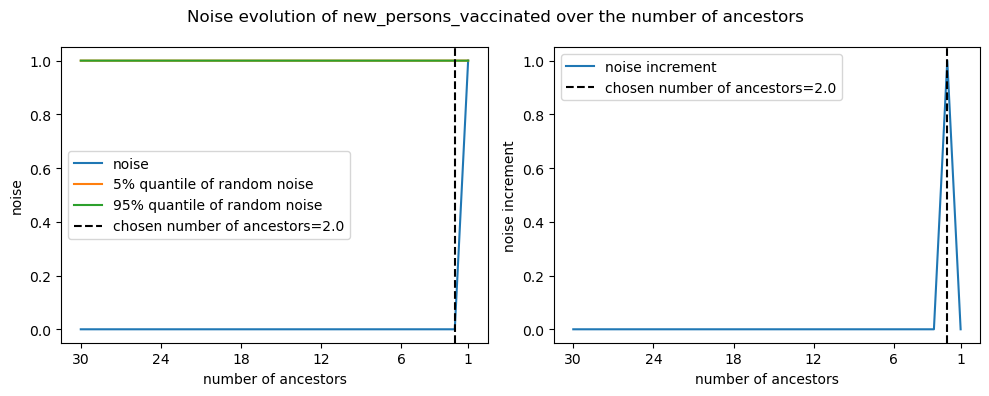

Ancestors of new_persons_vaccinated: ['new_persons_fully_vaccinated', 'new_vaccine_doses_administered']


Results for cumulative_persons_vaccinated
Kernel [linear] has n/(n+s)=1.5902381360359058e-08, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.023156740909560568, Z=(0.94, 0.98), gamma=3.57e-09
cumulative_persons_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


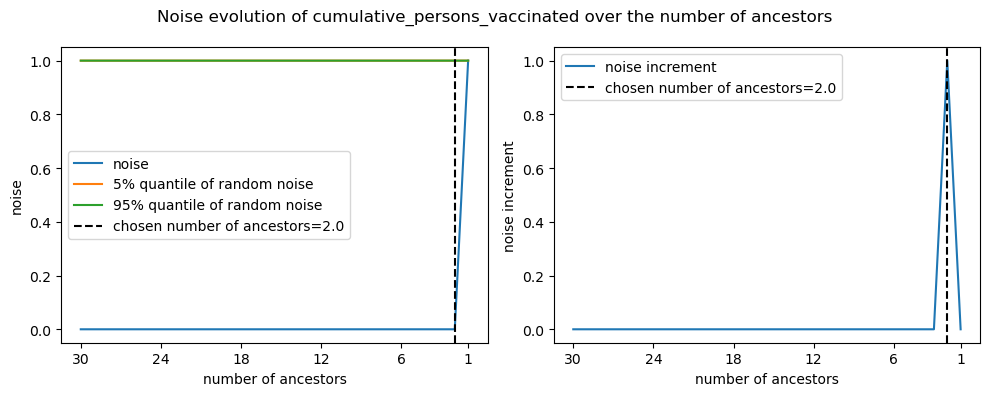

Ancestors of cumulative_persons_vaccinated: ['cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered']


Results for new_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=3.759778097645358e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=6.551387871364364e-07, Z=(0.96, 0.99), gamma=1.00e-09
new_persons_fully_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


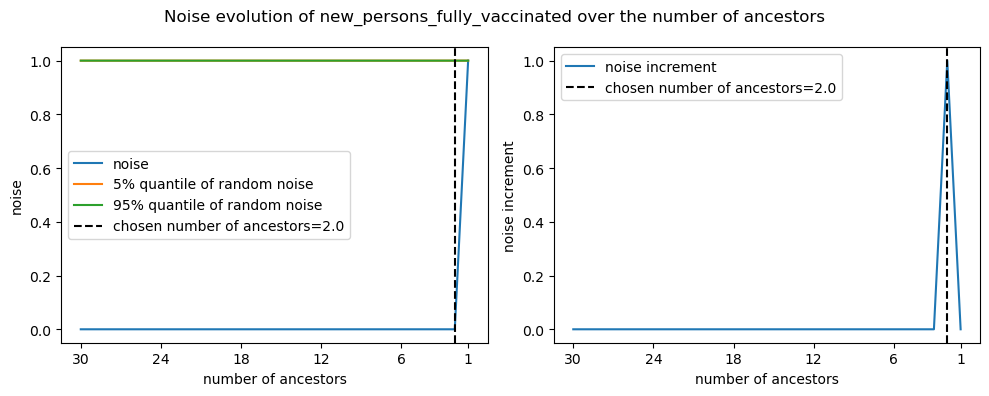

Ancestors of new_persons_fully_vaccinated: ['new_persons_vaccinated', 'new_vaccine_doses_administered']


Results for cumulative_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=1.2571082897885054e-08, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.01627968606083102, Z=(0.95, 0.98), gamma=1.49e-09
cumulative_persons_fully_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


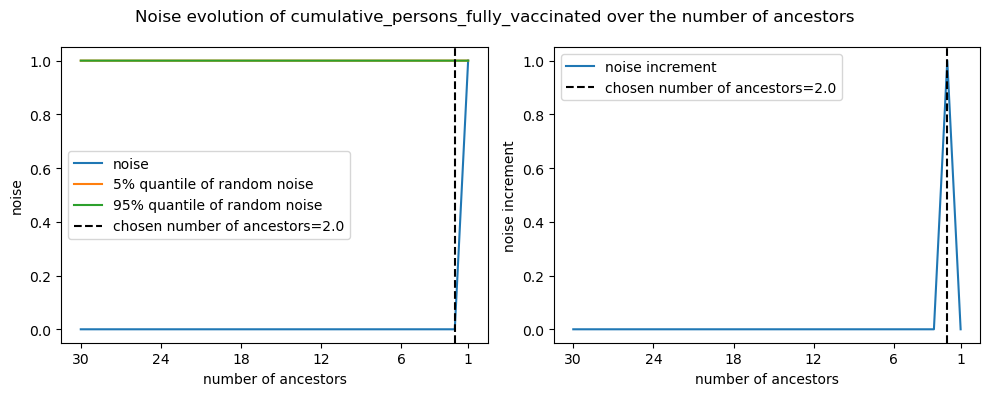

Ancestors of cumulative_persons_fully_vaccinated: ['cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered']


Results for new_vaccine_doses_administered
Kernel [linear] has n/(n+s)=4.248921733184904e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.163690107279377e-08, Z=(0.96, 0.99), gamma=1.00e-09
new_vaccine_doses_administered has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


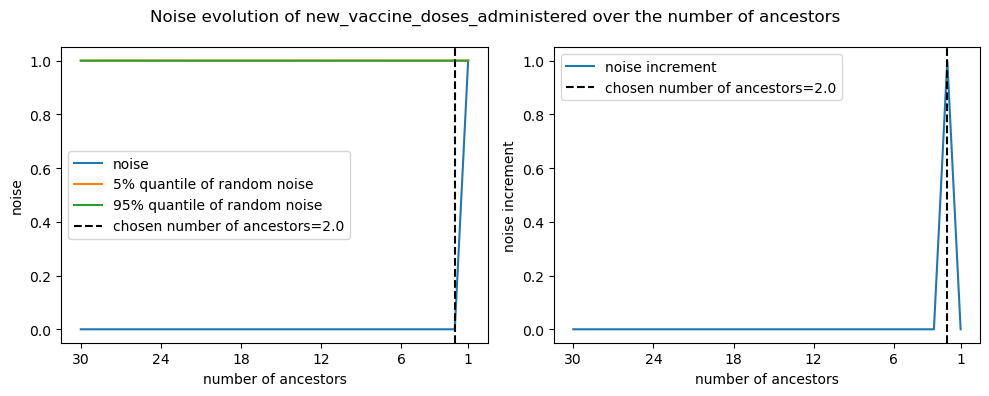

Ancestors of new_vaccine_doses_administered: ['new_persons_vaccinated', 'new_persons_fully_vaccinated']


Results for cumulative_vaccine_doses_administered
Kernel [linear] has n/(n+s)=2.1800987748771727e-10, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.001041879084528577, Z=(0.96, 0.99), gamma=1.00e-09
cumulative_vaccine_doses_administered has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


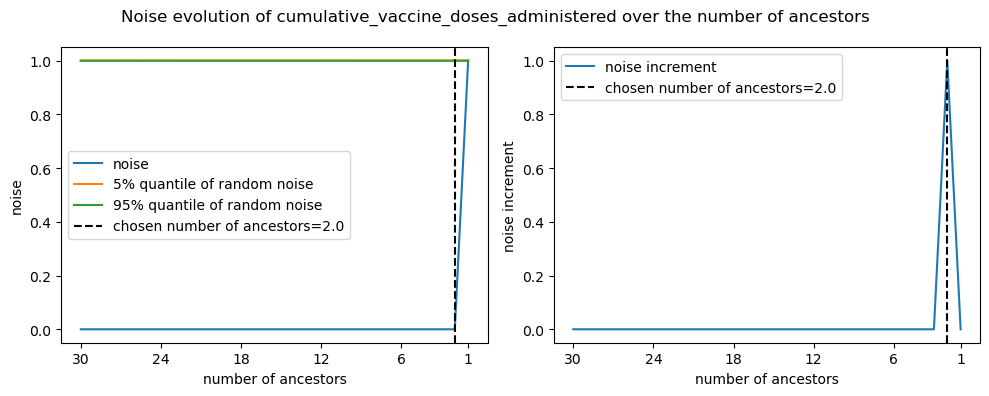

Ancestors of cumulative_vaccine_doses_administered: ['cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']



Finding ancestors with kernel [quadratic]: 100%|██████████| 29/29 [00:06<00:00,  4.65it/s]



Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.7503228502073165, Z=(1.00, 1.00), gamma=1.38e-01
Kernel [quadratic] has n/(n+s)=0.6421934309623041, Z=(0.94, 0.96), gamma=5.66e-03
current_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.36 after pruning)


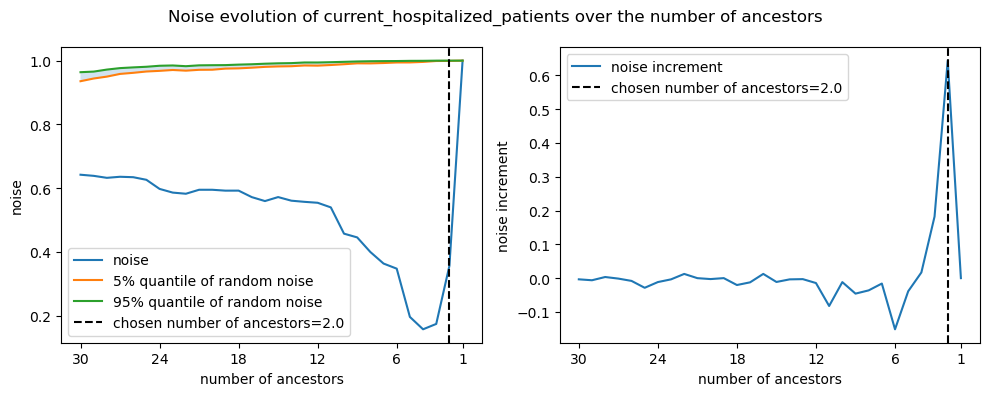

Ancestors of current_hospitalized_patients: ['cumulative_hospitalized_patients', 'new_recovered']


Results for cumulative_intensive_care_patients
Kernel [linear] has n/(n+s)=0.8542824677219935, Z=(1.00, 1.00), gamma=2.45e-02
Kernel [quadratic] has n/(n+s)=0.7802478153270341, Z=(0.93, 0.96), gamma=3.28e-05
cumulative_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.83 after pruning)


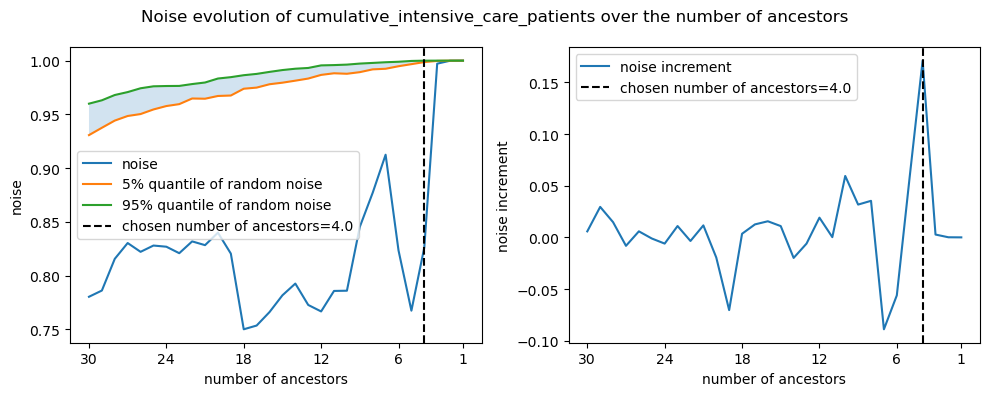

Ancestors of cumulative_intensive_care_patients: ['new_recovered', 'cumulative_recovered', 'cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered']


Results for current_intensive_care_patients
Kernel [linear] has n/(n+s)=0.6927148608469915, Z=(0.99, 1.00), gamma=4.82e+00
Kernel [quadratic] has n/(n+s)=0.6416994553100951, Z=(0.94, 0.96), gamma=1.45e-02
current_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.66 after pruning)


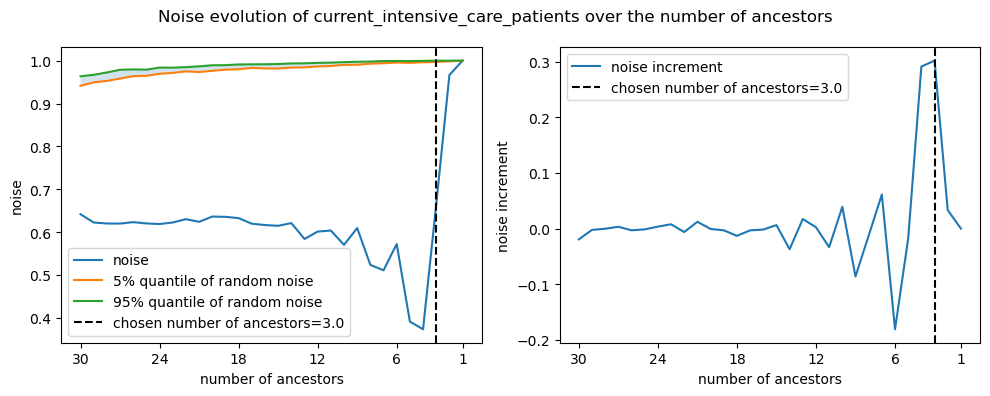

Ancestors of current_intensive_care_patients: ['cumulative_intensive_care_patients', 'new_recovered', 'cumulative_tested']


Results for school_closing
Kernel [linear] has n/(n+s)=0.7033684116842349, Z=(0.99, 1.00), gamma=8.06e+00
Kernel [quadratic] has n/(n+s)=0.07809321573442876, Z=(0.92, 0.95), gamma=3.59e-06
school_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.01 after pruning)


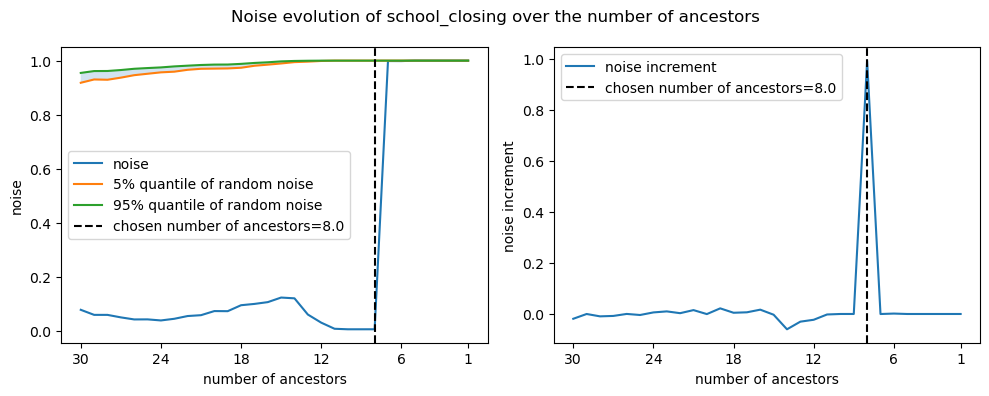

Ancestors of school_closing: ['workplace_closing', 'cancel_public_events', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index']


Results for workplace_closing
Kernel [linear] has n/(n+s)=0.7747558839493733, Z=(0.99, 1.00), gamma=3.05e+01
Kernel [quadratic] has n/(n+s)=0.6535906051240935, Z=(0.93, 0.96), gamma=2.07e-02
workplace_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.90 after pruning)


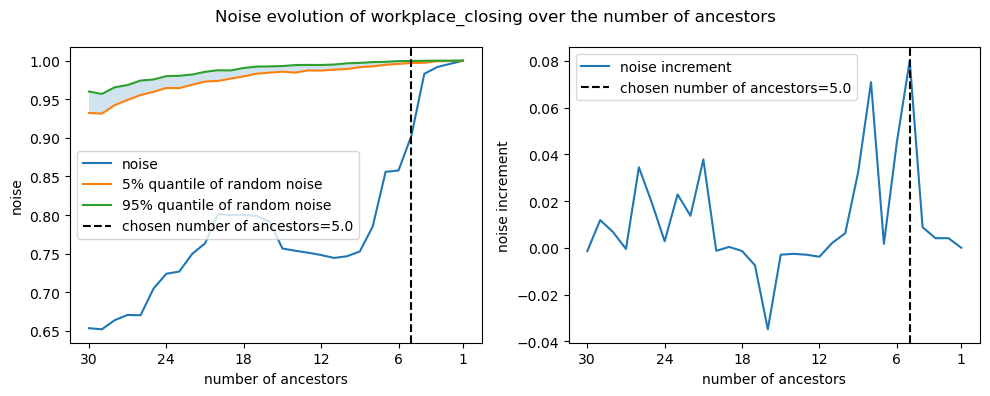

Ancestors of workplace_closing: ['cumulative_intensive_care_patients', 'restrictions_on_internal_movement', 'vaccination_policy', 'stringency_index', 'cumulative_tested']


Results for cancel_public_events
Kernel [linear] has n/(n+s)=0.7213187686520166, Z=(0.99, 1.00), gamma=6.66e+00
Kernel [quadratic] has n/(n+s)=0.0003233310176230473, Z=(0.98, 0.99), gamma=1.00e-09
cancel_public_events has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


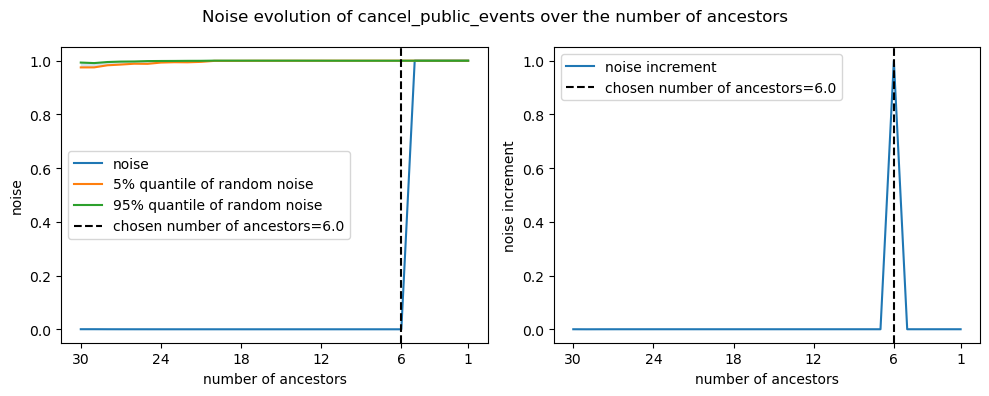

Ancestors of cancel_public_events: ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'stay_at_home_requirements', 'income_support', 'vaccination_policy']


Results for restrictions_on_gatherings
Kernel [linear] has n/(n+s)=0.657208826410401, Z=(0.99, 1.00), gamma=5.22e+00
Kernel [quadratic] has n/(n+s)=0.0005812378065387179, Z=(0.98, 0.99), gamma=1.00e-09
restrictions_on_gatherings has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


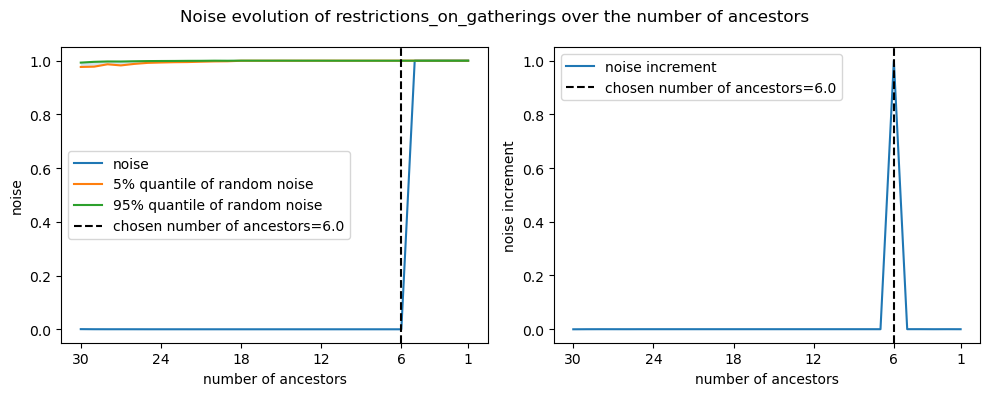

Ancestors of restrictions_on_gatherings: ['cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'stringency_index']


Results for public_transport_closing
Kernel [linear] has n/(n+s)=0.46254728467496875, Z=(0.99, 1.00), gamma=1.53e+00
Kernel [quadratic] has n/(n+s)=0.0001831945577706288, Z=(0.98, 0.99), gamma=1.00e-09
public_transport_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


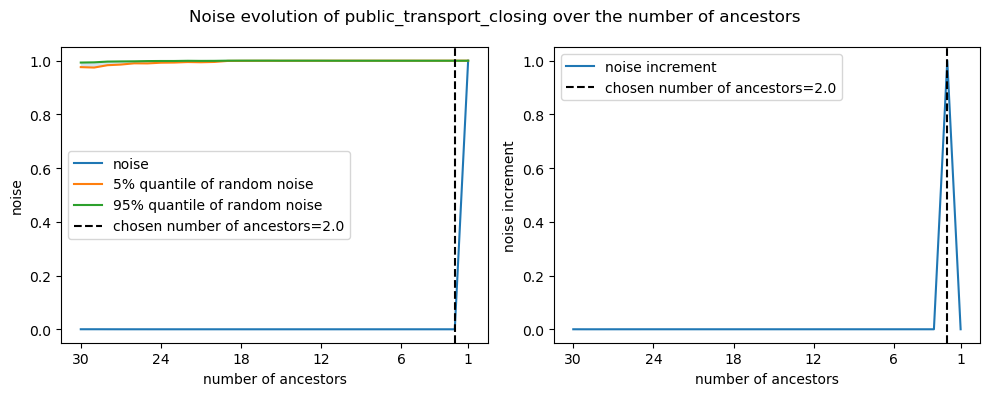

Ancestors of public_transport_closing: ['stay_at_home_requirements', 'restrictions_on_internal_movement']


Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.7354365191161624, Z=(0.99, 1.00), gamma=4.98e+00
Kernel [quadratic] has n/(n+s)=9.380351650600501e-05, Z=(0.98, 0.99), gamma=1.00e-09
stay_at_home_requirements has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


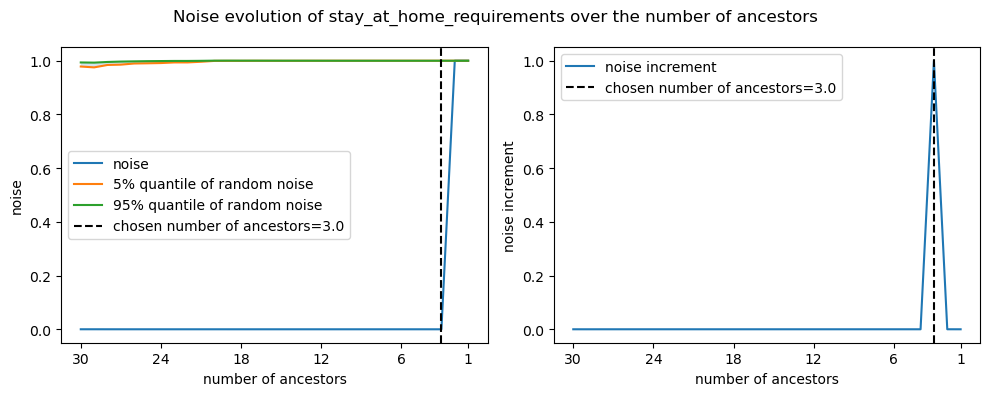

Ancestors of stay_at_home_requirements: ['cancel_public_events', 'restrictions_on_gatherings', 'stringency_index']


Results for restrictions_on_internal_movement
Kernel [linear] has n/(n+s)=0.6695290721618674, Z=(0.99, 1.00), gamma=7.20e+00
Kernel [quadratic] has n/(n+s)=0.22082930894999536, Z=(0.92, 0.96), gamma=1.83e-05
restrictions_on_internal_movement has ancestors with the kernel [quadratic] | (n/(s+n)=0.47 after pruning)


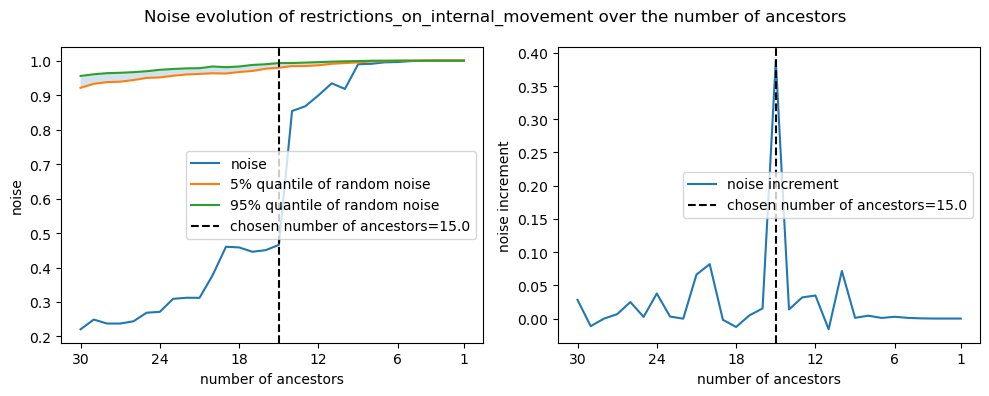

Ancestors of restrictions_on_internal_movement: ['cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_recovered', 'cumulative_deceased', 'cumulative_tested', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']


Results for income_support
Kernel [linear] has n/(n+s)=0.7706031399523876, Z=(0.99, 1.00), gamma=5.83e+00
Kernel [quadratic] has n/(n+s)=0.0010818835837631882, Z=(0.98, 0.99), gamma=1.00e-09
income_support has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


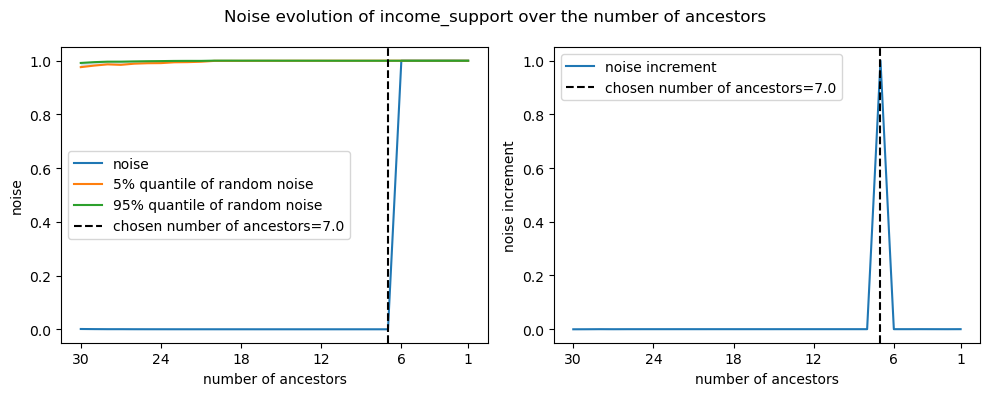

Ancestors of income_support: ['cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'stringency_index']


Results for new_confirmed
Kernel [linear] has n/(n+s)=0.8269950981937076, Z=(0.99, 1.00), gamma=8.43e+01
Kernel [quadratic] has n/(n+s)=0.8024788879174284, Z=(0.95, 0.97), gamma=5.26e+00
new_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.92 after pruning)


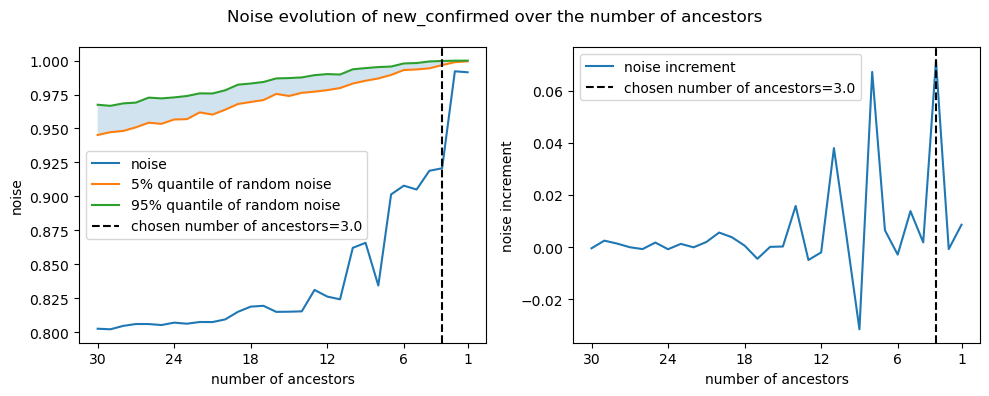

Ancestors of new_confirmed: ['current_hospitalized_patients', 'facial_coverings', 'cumulative_persons_vaccinated']


Results for cumulative_confirmed
Kernel [linear] has n/(n+s)=0.8333099007596526, Z=(0.99, 1.00), gamma=4.38e+00
Kernel [quadratic] has n/(n+s)=0.7265665683219192, Z=(0.93, 0.96), gamma=9.23e-04
cumulative_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.66 after pruning)


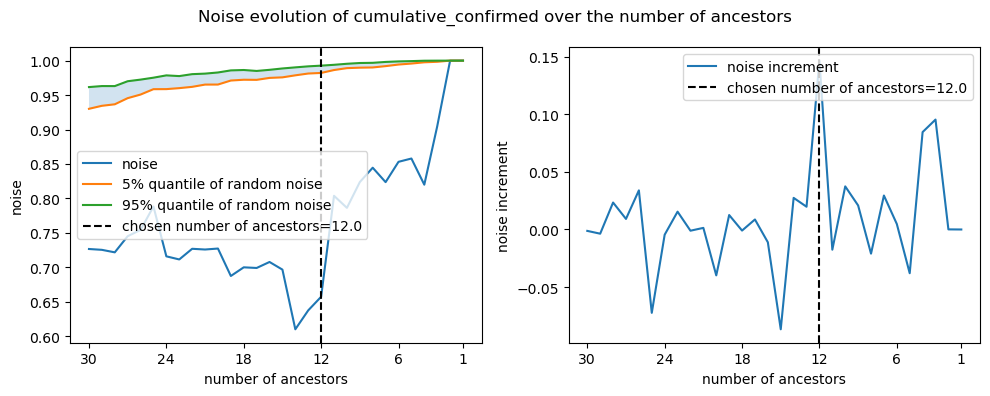

Ancestors of cumulative_confirmed: ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_internal_movement', 'vaccination_policy', 'new_recovered', 'cumulative_deceased', 'cumulative_tested', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']


Results for cumulative_deceased
Kernel [linear] has n/(n+s)=0.8430611500377012, Z=(0.99, 1.00), gamma=2.70e+00
Kernel [quadratic] has n/(n+s)=0.8309792467316439, Z=(0.94, 0.96), gamma=7.03e-02
cumulative_deceased has ancestors with the kernel [quadratic] | (n/(s+n)=0.93 after pruning)


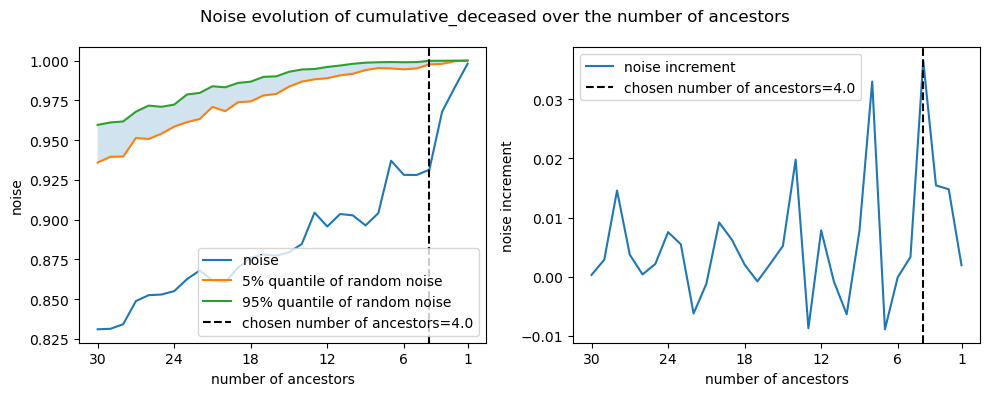

Ancestors of cumulative_deceased: ['school_closing', 'new_recovered', 'cumulative_confirmed', 'cumulative_persons_vaccinated']


Results for cumulative_recovered
Kernel [linear] has n/(n+s)=0.8129147661615209, Z=(1.00, 1.00), gamma=4.26e-01
Kernel [quadratic] has n/(n+s)=0.6398986976303483, Z=(0.94, 0.96), gamma=4.14e-04
cumulative_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.64 after pruning)


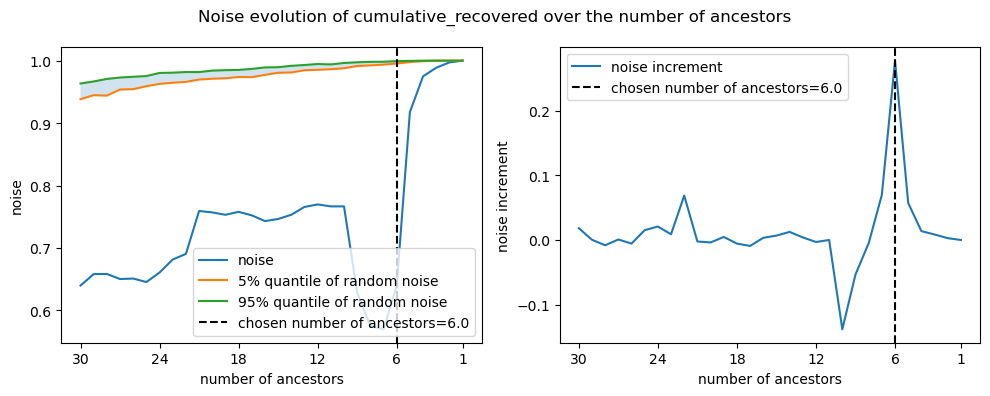

Ancestors of cumulative_recovered: ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'income_support', 'cumulative_tested', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']


Results for cumulative_tested
Kernel [linear] has n/(n+s)=0.7400877221527854, Z=(1.00, 1.00), gamma=2.69e-01
Kernel [quadratic] has n/(n+s)=0.6895584240456261, Z=(0.93, 0.96), gamma=1.44e-04
cumulative_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.83 after pruning)


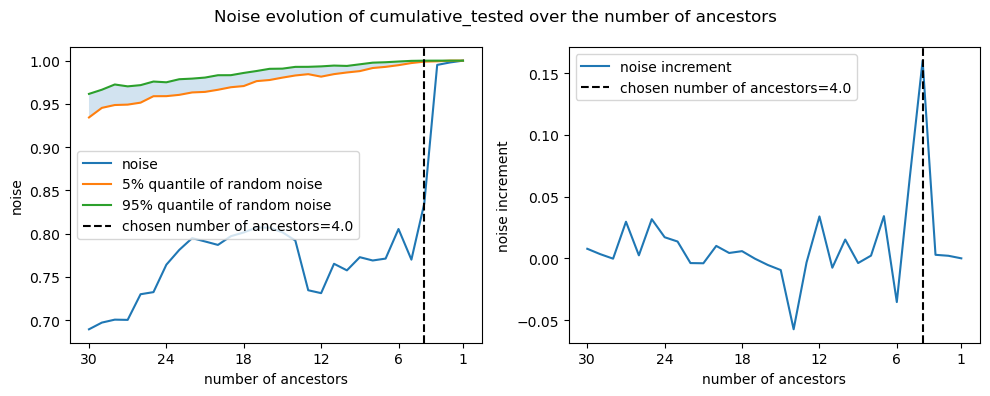

Ancestors of cumulative_tested: ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_recovered', 'cumulative_persons_vaccinated']



In [8]:
graph_discovery.fit()

In [9]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

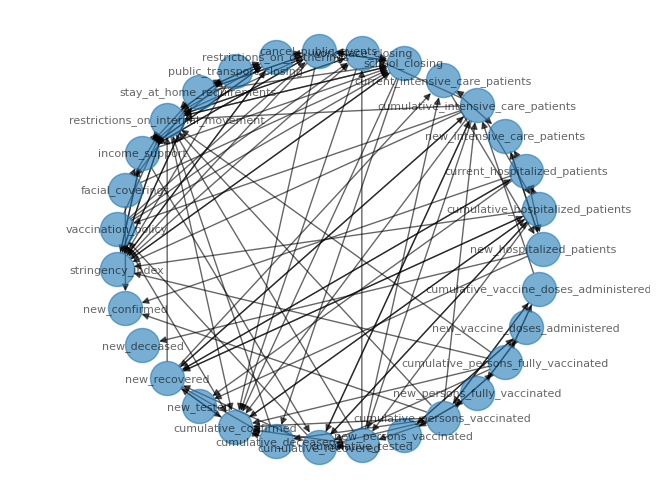

In [10]:
plot_a_network(graph_discovery.G,False)

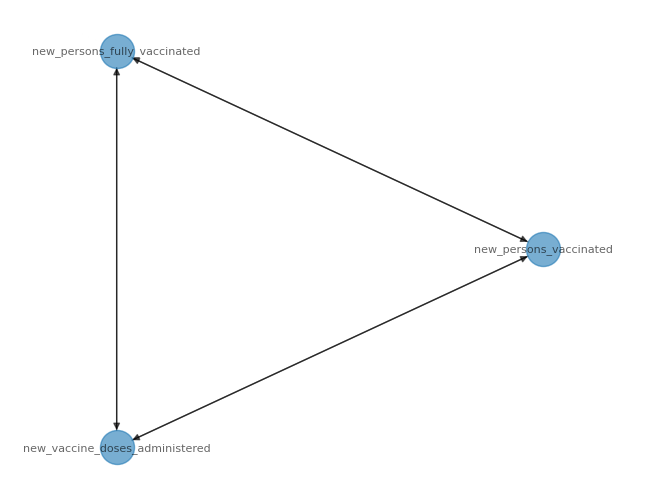

In [11]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

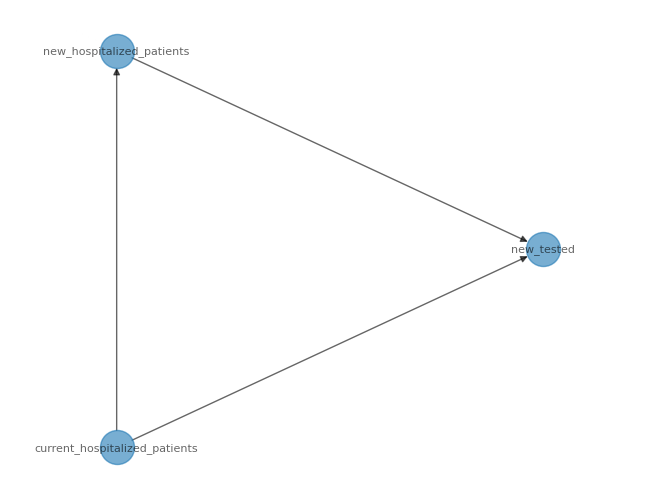

In [12]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_tested',undirected=False,radius=1).reverse(),False)

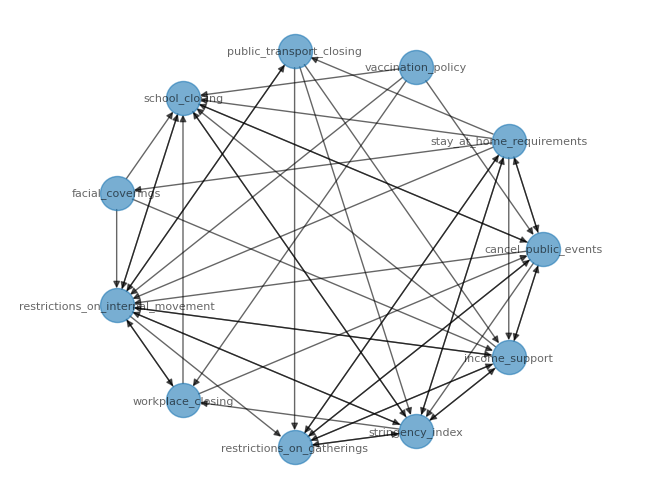

In [13]:
G_gov=graph_discovery.G.subgraph([
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index'])
plot_a_network(G_gov,False)

# Delete redundant information

In [14]:
reduced_names = ['new_hospitalized_patients',
 'current_hospitalized_patients',
 'stay_at_home_requirements',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
 'new_persons_vaccinated']
df_reduced=df[reduced_names]

Finding ancestors with kernel [quadratic]: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]



Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.7786359104297611, Z=(1.00, 1.00), gamma=6.21e+01
Kernel [quadratic] has n/(n+s)=0.7737738397083535, Z=(0.99, 1.00), gamma=2.66e+01
Kernel [gaussian] has n/(n+s)=0.8237612253651738, Z=(0.81, 0.85), gamma=4.95e-01
stay_at_home_requirements has ancestors with the kernel [quadratic] | (n/(s+n)=0.89 after pruning)


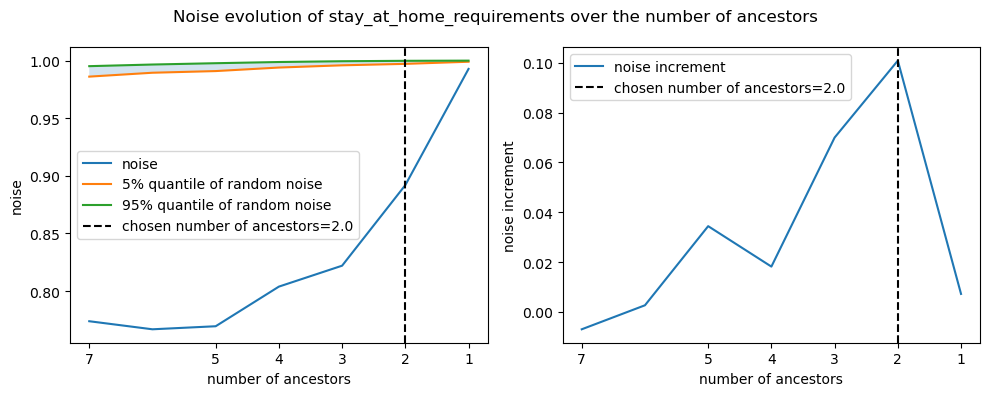

Ancestors of stay_at_home_requirements: ['current_hospitalized_patients', 'new_confirmed']


Results for new_tested
Kernel [linear] has n/(n+s)=0.7885205690864117, Z=(0.99, 1.00), gamma=1.72e+02
Kernel [quadratic] has n/(n+s)=0.6878527881899105, Z=(0.99, 1.00), gamma=7.01e+01
Kernel [gaussian] has n/(n+s)=0.7590652756915874, Z=(0.83, 0.87), gamma=1.52e-01
new_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.77 after pruning)


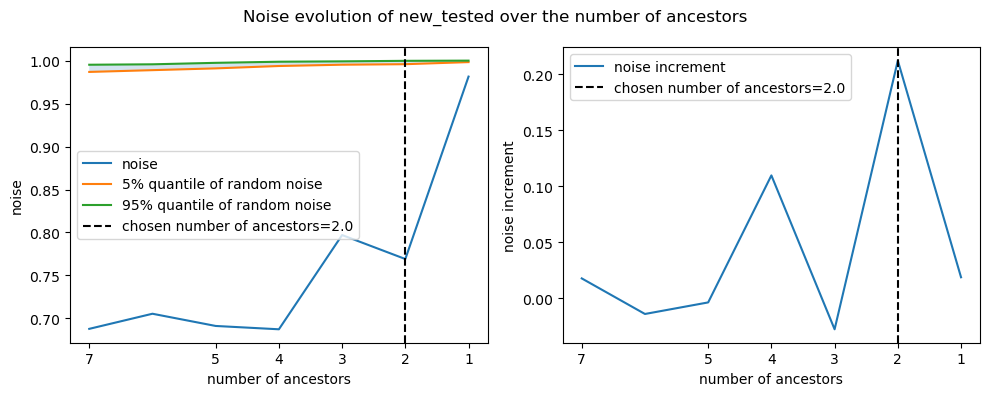

Ancestors of new_tested: ['new_hospitalized_patients', 'current_hospitalized_patients']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=0.9136872868207382, Z=(0.99, 1.00), gamma=3.03e+02
Kernel [quadratic] has n/(n+s)=0.718306327994596, Z=(0.99, 1.00), gamma=6.98e+01
Kernel [gaussian] has n/(n+s)=0.7924206012530518, Z=(0.84, 0.88), gamma=1.51e-01
new_persons_vaccinated has ancestors with the kernel [quadratic] | (n/(s+n)=0.85 after pruning)


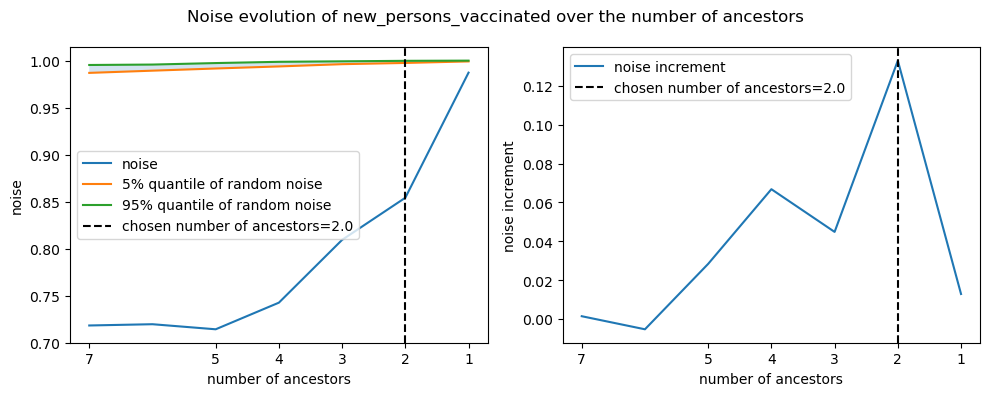

Ancestors of new_persons_vaccinated: ['stay_at_home_requirements', 'new_recovered']



Finding ancestors with kernel [gaussian]: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.8249475892936053, Z=(1.00, 1.00), gamma=5.87e+01
Kernel [quadratic] has n/(n+s)=0.7441206090204597, Z=(0.99, 0.99), gamma=2.21e+01
Kernel [gaussian] has n/(n+s)=0.7345588896710215, Z=(0.83, 0.87), gamma=1.81e-01
new_hospitalized_patients has ancestors with the kernel [gaussian] | (n/(s+n)=0.86 after pruning)


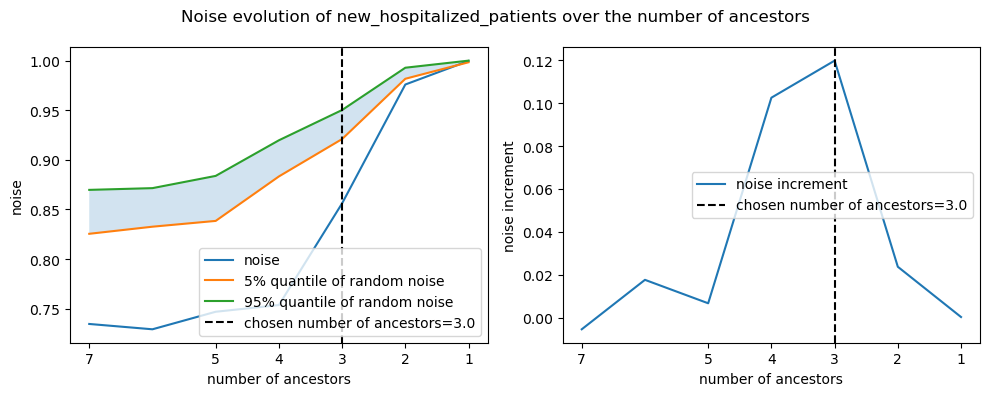

Ancestors of new_hospitalized_patients: ['current_hospitalized_patients', 'new_recovered', 'new_tested']


Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.7504066671700347, Z=(1.00, 1.00), gamma=6.62e+01
Kernel [quadratic] has n/(n+s)=0.7438139792829734, Z=(0.99, 1.00), gamma=2.70e+01
Kernel [gaussian] has n/(n+s)=0.5359143756051287, Z=(0.82, 0.87), gamma=2.62e-01
current_hospitalized_patients has ancestors with the kernel [gaussian] | (n/(s+n)=0.74 after pruning)


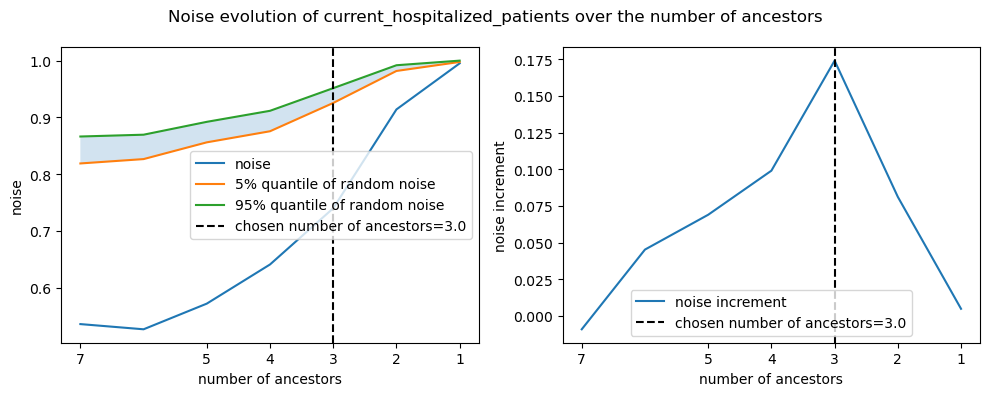

Ancestors of current_hospitalized_patients: ['new_recovered', 'new_tested', 'new_persons_vaccinated']


Results for new_confirmed
Kernel [linear] has n/(n+s)=0.8568712091110203, Z=(1.00, 1.00), gamma=1.78e+02
Kernel [quadratic] has n/(n+s)=0.8276692483079072, Z=(0.99, 0.99), gamma=7.34e+01
Kernel [gaussian] has n/(n+s)=0.5868826954284726, Z=(0.81, 0.86), gamma=2.53e-01
new_confirmed has ancestors with the kernel [gaussian] | (n/(s+n)=0.81 after pruning)


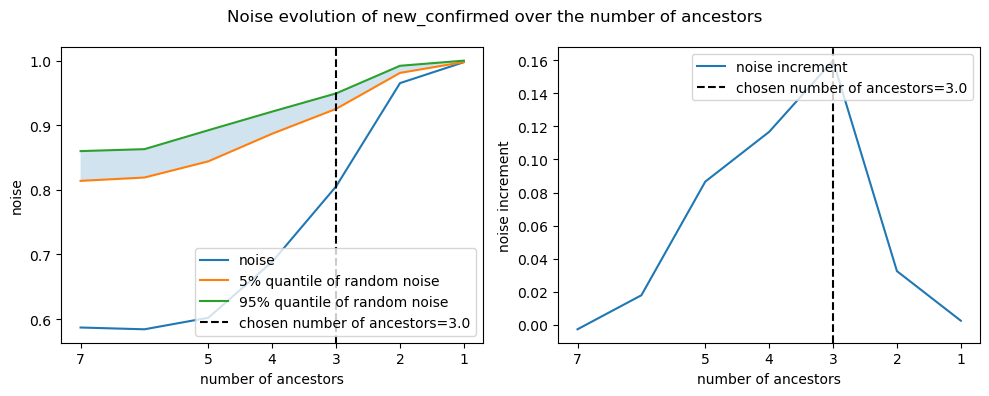

Ancestors of new_confirmed: ['new_hospitalized_patients', 'new_recovered', 'new_tested']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.8114024575004387, Z=(1.00, 1.00), gamma=9.73e+01
Kernel [quadratic] has n/(n+s)=0.8050844877597874, Z=(0.99, 0.99), gamma=7.13e+01
Kernel [gaussian] has n/(n+s)=0.7385558950089437, Z=(0.83, 0.87), gamma=1.53e-01
new_deceased has ancestors with the kernel [gaussian] | (n/(s+n)=0.74 after pruning)


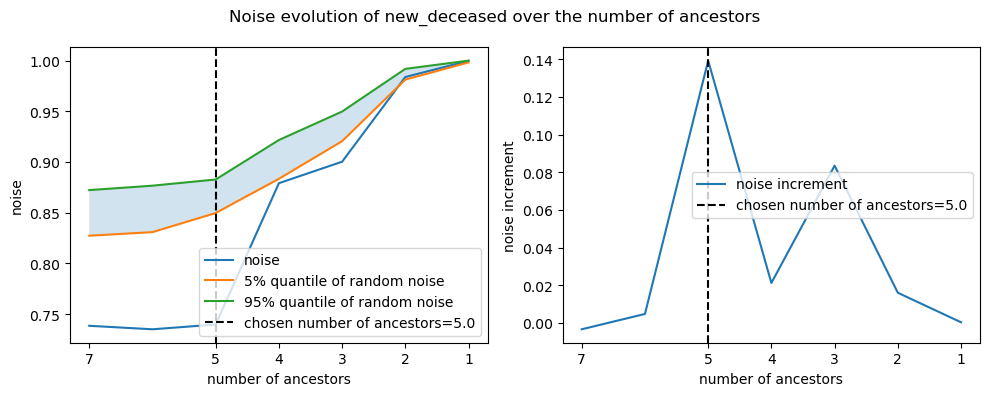

Ancestors of new_deceased: ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered', 'new_tested', 'new_persons_vaccinated']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.7520197627602945, Z=(0.99, 1.00), gamma=1.15e+02
Kernel [quadratic] has n/(n+s)=0.6881188782240489, Z=(0.99, 0.99), gamma=2.88e+01
Kernel [gaussian] has n/(n+s)=0.6828837655526298, Z=(0.82, 0.86), gamma=3.45e-01
new_recovered has ancestors with the kernel [gaussian] | (n/(s+n)=0.80 after pruning)


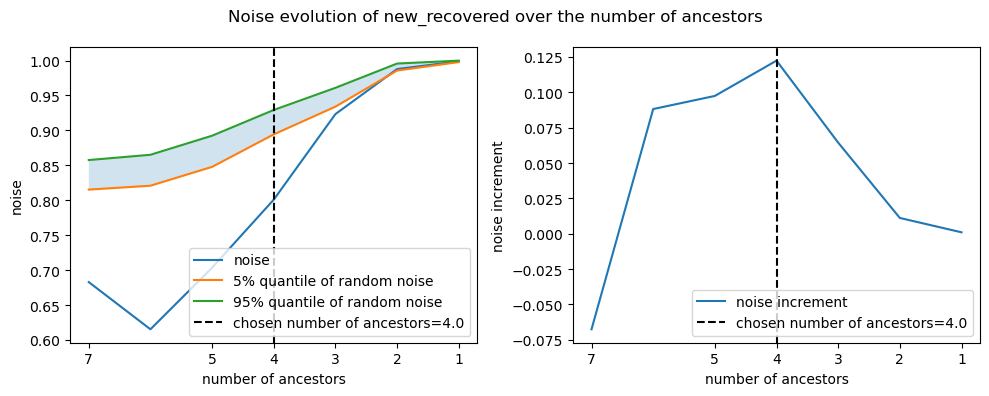

Ancestors of new_recovered: ['current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_tested']



In [16]:

graph_discovery_reduced=CHD.GraphDiscovery.from_dataframe(df_reduced,normalize=True)
graph_discovery_reduced.fit()

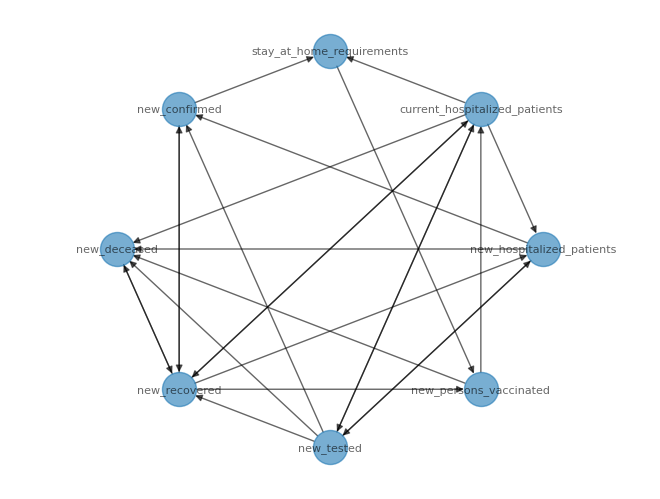

In [17]:
plot_a_network(graph_discovery_reduced.G,False)